## Downloading data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import joblib
import sys

print(sys.version)
print(joblib.__version__)
print(np.version.version)
print(scipy.__version__)

3.9.2 (default, Feb 28 2021, 17:03:44) 
[GCC 10.2.1 20210110]
0.17.0
1.24.2
1.6.0


In [52]:
# Wczytanie pełnych (oryginalnych) danych

df = pd.read_csv('housing.csv', sep = ',', header = 0)
# data_california = np.array(data_california)
print(df[:6])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## Test/dev/train sets

In [91]:
# https://stackoverflow.com/a/70573258

def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)
    
    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

In [93]:
# Podział 6:2:2
train, test = train_test_split(df, 0.2)
train, dev = train_test_split(train, 0.25)

print(len(train))
print(len(test))
print(len(dev))

12384
4128
4128


## Stats

### General stats

In [73]:
print("The DataFrame :")
display(df.head())
print()

print("total number of samples: ",len(df))
print()


print("The column headers :")
print(list(df.columns))
print()

print("Number of columns: ", len(list(df.columns)))
print()



The DataFrame :


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



total number of samples:  20640

The column headers :
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

Number of columns:  10



### Class stats

In [77]:
df.mean()

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [78]:
df.min()

longitude               -124.35
latitude                  32.54
housing_median_age            1
total_rooms                   2
total_bedrooms                1
population                    3
households                    1
median_income            0.4999
median_house_value        14999
ocean_proximity       <1H OCEAN
dtype: object

In [79]:
df.max()

longitude                -114.31
latitude                   41.95
housing_median_age            52
total_rooms                39320
total_bedrooms              6445
population                 35682
households                  6082
median_income            15.0001
median_house_value        500001
ocean_proximity       NEAR OCEAN
dtype: object

In [81]:
df.std()

longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           421.385070
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64

In [80]:
df.median()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

## Normalize

In [97]:
print(df['longitude'])

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64


ocean_proximity
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
INLAND        6551
<1H OCEAN     9136
Name: longitude, dtype: int64


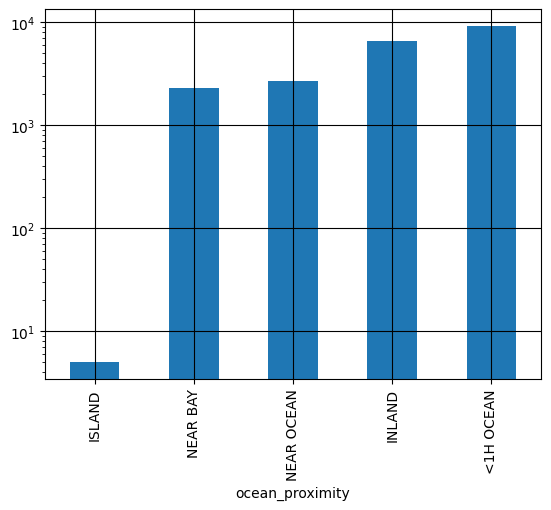

In [136]:
import matplotlib.pyplot as plt
cat_totals = df.groupby("ocean_proximity")['longitude'].count().sort_values()
print(cat_totals)

cat_totals.plot( kind='bar')
plt.yscale('log',base=10)
plt.grid(True)

In [101]:
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [163]:
# MAP NAMES TO NUMBERS
# codes = {'ISLAND':0, "NEAR BAY":1, 'NEAR OCEAN':2, 'INLAND': 3, '<1H OCEAN':4}
# # copy the data
# df_max_scaled = df.copy()

# df_max_scaled['ocean_proximity'] = df_max_scaled['ocean_proximity'].map(codes)
# print(df_max_scaled)

Series([], Name: longitude, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

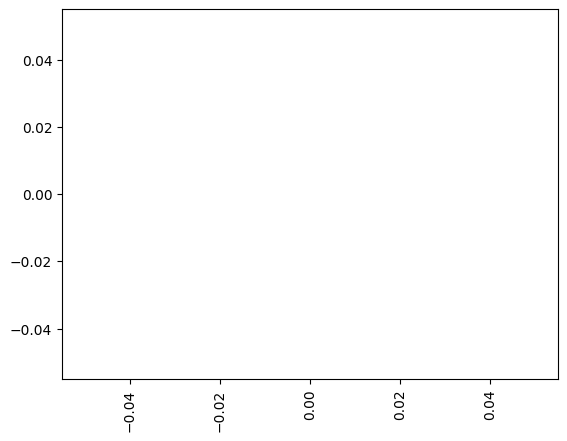

In [164]:
import matplotlib.pyplot as plt
cat_totals = df_max_scaled.groupby("ocean_proximity")['longitude'].count().sort_values()
print(cat_totals)

cat_totals.plot( kind='bar')
plt.yscale('log',base=10)
plt.grid(True)

In [165]:
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-0.982951,0.902980,0.788462,0.022380,0.020016,0.009024,0.020717,0.555010,0.905198,NaN
1,-0.982871,0.902503,0.403846,0.180544,0.171606,0.067289,0.187110,0.553423,0.716999,NaN
2,-0.983032,0.902265,1.000000,0.037309,0.029480,0.013901,0.029102,0.483823,0.704199,NaN
3,-0.983112,0.902265,1.000000,0.032401,0.036462,0.015638,0.036008,0.376204,0.682599,NaN
4,-0.983112,0.902265,1.000000,0.041378,0.043445,0.015834,0.042585,0.256412,0.684399,NaN
...,...,...,...,...,...,...,...,...,...,...
20635,-0.973784,0.941120,0.480769,0.042345,0.058029,0.023681,0.054258,0.104019,0.156200,NaN
20636,-0.974749,0.941359,0.346154,0.017726,0.023274,0.009977,0.018744,0.170452,0.154200,NaN
20637,-0.974829,0.939928,0.326923,0.057325,0.075252,0.028222,0.071194,0.113333,0.184600,NaN
20638,-0.975633,0.939928,0.346154,0.047304,0.063460,0.020767,0.057382,0.124479,0.169400,NaN
